EDA of Travel.csv

Colab Link : https://colab.research.google.com/drive/1zEV_Rx3IOabBXKZl6zzJep6XYKYps_WH?usp=sharing

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pandas/Travel.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [125]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

A. What is the distribution of customerages, and how does age relate to product purchase (ProdTaken)?  

In [126]:
#age contains 226 null values
df['Age'].isnull().sum()

226

In [127]:
#we have to fill those null values
df['Age'].fillna(value=df['Age'].mean(),inplace=True)


In [128]:
df.loc[:,"ProdTaken":"Age"].head()

,ProdTaken,Age
0,1,41.000000
1,0,49.000000
2,1,37.000000
3,0,33.000000
4,0,37.622265


In [129]:
#Defining bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# 'AgeGroup' based on the age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [130]:

df1 = df.groupby("AgeGroup")["ProdTaken"].sum()

In [131]:

df1

AgeGroup
0-20      29
21-30    264
31-40    371
41-50    155
51-60    100
60+        1
Name: ProdTaken, dtype: int64

Text(0.5, 1.0, 'Relation between Age Group and Product Taken')

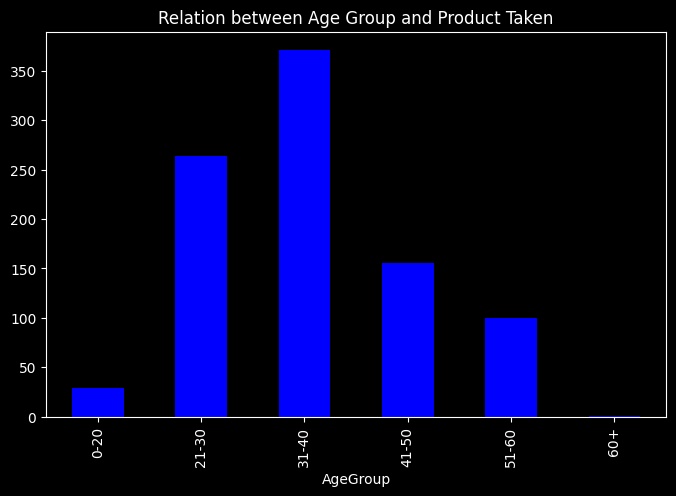

In [132]:
plt.style.use("dark_background")
plt.figure(figsize = (8, 5))
df1.plot(kind='bar',color="blue")
plt.title("Relation between Age Group and Product Taken")



---



B. How does the type of contact(type of contact)influence the likelihood of purchasing a
travel product?

In [133]:
pd.crosstab(df['ProdTaken'],df['TypeofContact'])


TypeofContact,Company Invited,Self Enquiry
ProdTaken,,
0,1109,2837
1,310,607


In [134]:
df2=pd.crosstab(df['ProdTaken'],df['TypeofContact']).sum()

Text(0.5, 1.0, 'Company Invited Vs Self Enquiry')

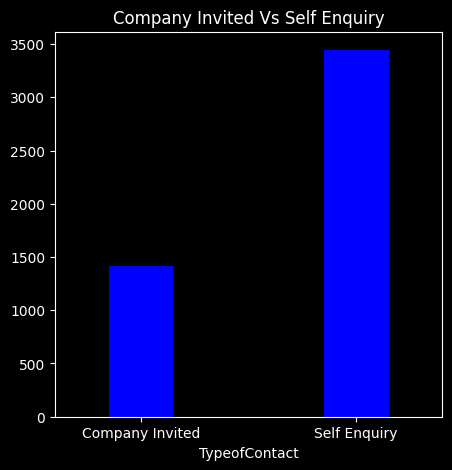

In [135]:
plt.figure(figsize = (5, 5))
df2.plot(kind='bar',rot=0, width=0.3,color="blue")
plt.title("Company Invited Vs Self Enquiry")



---



C. Is there a correlation between the city tier(citytier)and monthly income (monthly
income) of customers?  

In [136]:
#There are 233 null values
df['MonthlyIncome'].isnull().sum()

233

In [137]:
#Filling null values
df['MonthlyIncome'].fillna(value=df['MonthlyIncome'].mean(),inplace=True)

In [138]:
df3 = df.groupby("CityTier")["MonthlyIncome"].mean()

In [139]:
df3

CityTier
1    23428.535682
2    23768.515762
3    24007.099278
Name: MonthlyIncome, dtype: float64

Text(0.5, 1.0, 'Average Income according to city Tier')

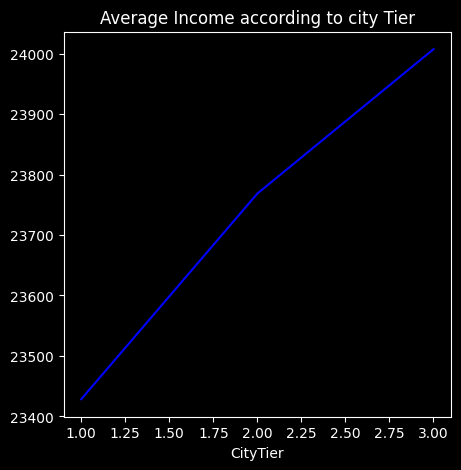

In [140]:
plt.figure(figsize = (5, 5))
df3.plot(kind='line',color="blue")
plt.title("Average Income according to city Tier")



---



D. What is the average duration of a pitch (duration of pitch)for customers who
purchased a product versus those who did not?

In [160]:
df['DurationOfPitch'].fillna(value=df['DurationOfPitch'].mean(),inplace=True)

In [162]:
df4=df.groupby('ProdTaken')['DurationOfPitch'].mean()
df4.index=["Product Not Taken","Product Taken"]

In [163]:
df4

Product Not Taken    15.186016
Product Taken        16.805530
Name: DurationOfPitch, dtype: float64

Text(0.5, 1.0, 'Product Taken Vs Avg Pitch Time')

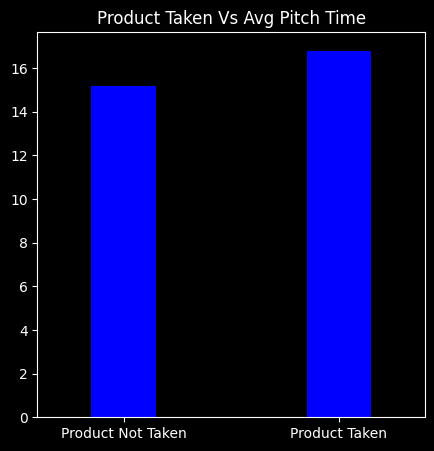

In [164]:
plt.figure(figsize = (5, 5))
df4.plot(kind='bar',rot=0, width=0.3,color="blue")
plt.title("Product Taken Vs Avg Pitch Time")



---



E. How do occupation types(occupation)distribute among customers,and is there an
occupation type that is more likely to purchase a travel product?

In [144]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40


In [145]:
df5=df['Occupation'].value_counts()

In [146]:
df5

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Customers of different Ocupation')

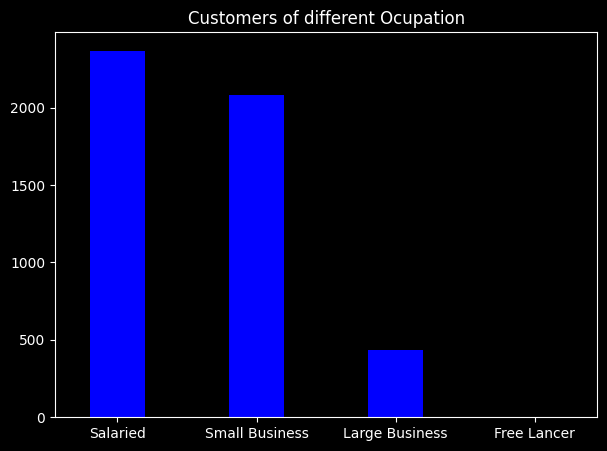

In [147]:
plt.figure(figsize = (7, 5))
df5.plot(kind='bar',rot=0, width=0.4,color="blue")
plt.title("Customers of different Ocupation")

In [148]:
df5_1=pd.crosstab(df['Occupation'],df['ProdTaken'])

In [149]:
df5_1

ProdTaken,0,1
Occupation,,
Free Lancer,0,2
Large Business,314,120
Salaried,1954,414
Small Business,1700,384


Text(0.5, 1.0, 'Customers of different Ocupation')

<Figure size 800x500 with 0 Axes>

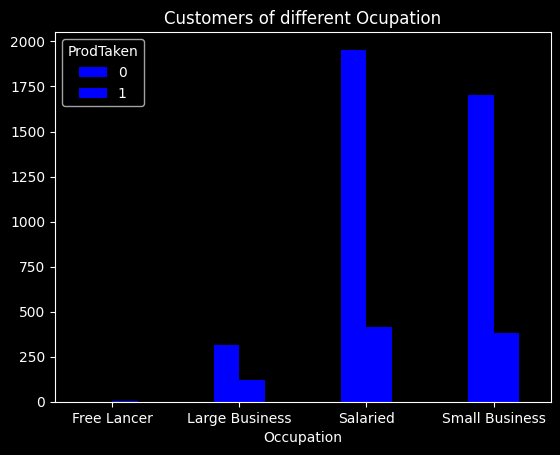

In [150]:
plt.figure(figsize = (8, 5))
df5_1.plot(kind='bar',rot=0, width=0.4,color="blue")
plt.title("Customers of different Ocupation")

In [151]:
#From graph we can see that salaried person buy most of the travel products.



---



F. Are there any gender-based preferences for the type of product pitched
(ProductPitched)?  

In [152]:
#There is some correction in the word Fe male so we need to correct it-
df.replace(to_replace="Fe Male",value="Female",inplace=True)

In [153]:
df6=pd.crosstab(df['ProductPitched'],df['Gender'])
df6

Gender,Female,Male
ProductPitched,,
Basic,680,1162
Deluxe,724,1008
King,82,148
Standard,326,416
Super Deluxe,160,182


Text(0.5, 1.0, 'Product Pitched Vs Gender')

<Figure size 800x500 with 0 Axes>

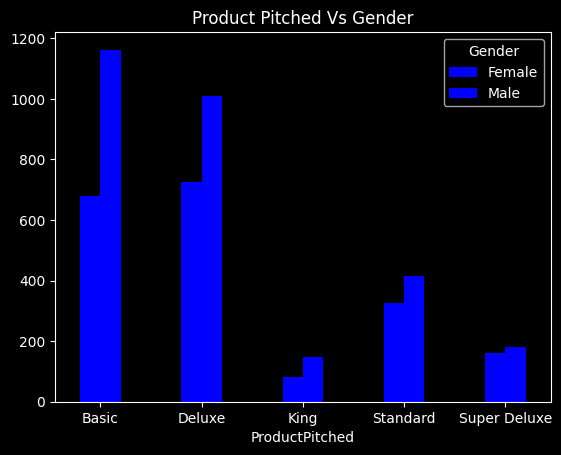

In [354]:
plt.figure(figsize = (8, 5))
df6.plot(kind='bar',rot=0, width=0.4,color="blue")
plt.title("Product Pitched Vs Gender")

In [155]:
#In superdelux product pitching numbers of both male and female are almost equal other than this male is more preferred.



---



G. What is the relationship between the number of trips(number of trips)taken by a
customer and their likelihood to purchase a new travel product?

In [323]:
df['NumberOfTrips'].isnull().sum()

140

In [325]:
df['NumberOfTrips'].fillna(value=df['NumberOfTrips'].mean(),inplace=True)

In [156]:
df.groupby([ 'NumberOfTrips' ,'ProdTaken']).size()

NumberOfTrips  ProdTaken
1.0            0             508
               1             112
2.0            0            1165
               1             299
3.0            0             862
               1             217
4.0            0             417
               1              61
5.0            0             396
               1              62
6.0            0             258
               1              64
7.0            0             156
               1              62
8.0            0              76
               1              29
19.0           1               1
20.0           1               1
21.0           0               1
22.0           0               1
dtype: int64



---



H. Does having a passport(passport)correlate with a higher number of trips taken or a
higher likelihood of purchasing a travel product?  

In [192]:
df8_1=df.groupby('Passport')['NumberOfTrips'].sum()
df8_1.index=["Dont Have Passport","Have Passport"]
df8_1

Dont Have Passport    10836.0
Have Passport          4531.0
Name: NumberOfTrips, dtype: float64

Text(0.5, 1.0, 'Passport Vs Number of Trips')

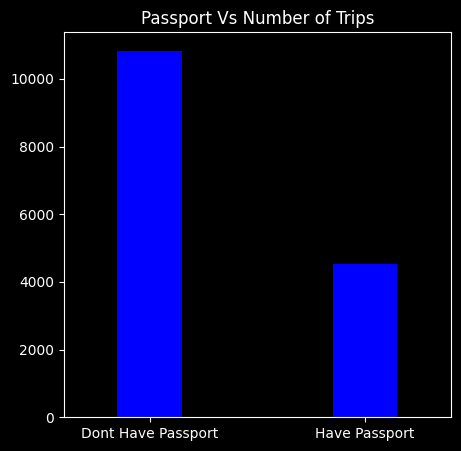

In [189]:
plt.figure(figsize = (5, 5))
df8_1.plot(kind='bar',rot=0, width=0.3,color="blue")
plt.title("Passport Vs Number of Trips")

In [ ]:
#Considering above graph we can see there is huge difference, as the number of trips who dont have passport is higher.

In [345]:
df8_2=df.groupby([ 'Passport' , 'ProdTaken']).size().unstack()
df8_2

ProdTaken,0,1
Passport,,
0,3040,426
1,928,494


Text(0.5, 1.0, 'Passport Vs Product Taken')

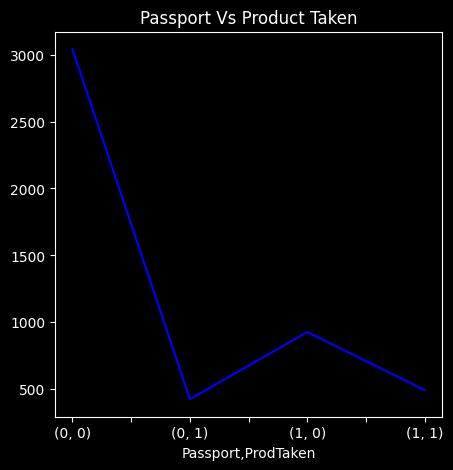

In [203]:
plt.figure(figsize = (5, 5))
df8_2.plot(kind='line',rot=0,color="blue")
plt.title("Passport Vs Product Taken")

In [210]:
#The person who dont have passport most of them also dont take the product.
#Passport hardly make any difference on the people who have taken the product.



---



I. How satisfied are customers with the pitch (pitch satisfaction score),and does this
satisfaction influence product purchase?  

In [344]:
df9=df.groupby('PitchSatisfactionScore').size()
df9

PitchSatisfactionScore
1     942
2     586
3    1478
4     912
5     970
dtype: int64

Text(0.5, 1.0, 'Pitch Satisfaction Score')

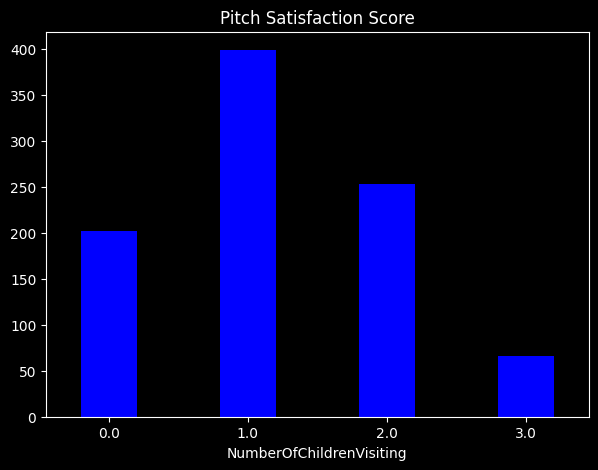

In [343]:
plt.figure(figsize = (7, 5))
df9.plot(kind='bar',rot=0,width=0.4,color="blue")
plt.title("Pitch Satisfaction Score")

In [ ]:
# 3 star rating is highest and also athe average rating.



---



J. Among customers with children (number of children visiting), how does the number
of children impact travel product purchases?

In [243]:
df['NumberOfChildrenVisiting'].isnull().sum()  #there are 66 null values

66

In [246]:
df['NumberOfChildrenVisiting'].fillna(value=df['NumberOfChildrenVisiting'].mean().round(),inplace=True)

In [341]:
df9=df.groupby('NumberOfChildrenVisiting')['ProdTaken'].sum()
df9

NumberOfChildrenVisiting
0.0    202
1.0    399
2.0    253
3.0     66
Name: ProdTaken, dtype: int64

Text(0.5, 1.0, 'Product Purchased Vs Number of Children Visited')

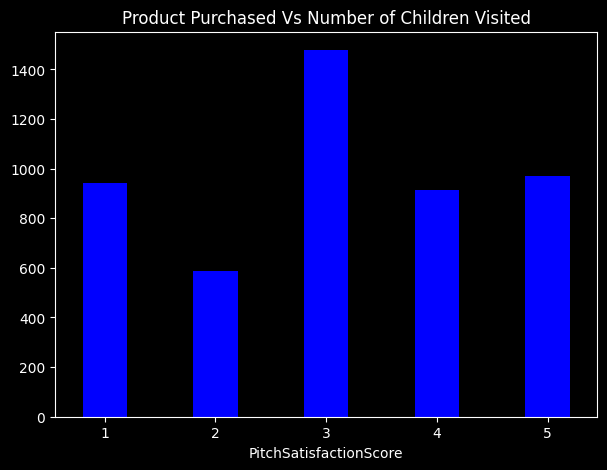

In [316]:
plt.figure(figsize = (7, 5))
df9.plot(kind='bar',rot=0,width=0.4,color="blue")
plt.title("Product Purchased Vs Number of Children Visited")

In [263]:
#Highest number of travel products puchased is when number of children visited is 1.



---



K. Gender preferences for product types: how does gender influence the preference for
different types of travel products pitched (product pitched)?

In [338]:
df10=df.groupby(['ProductPitched','Gender']).size().unstack()
df10

Gender,Female,Male
ProductPitched,,
Basic,680,1162
Deluxe,724,1008
King,82,148
Standard,326,416
Super Deluxe,160,182


Text(0.5, 1.0, 'Product Pitched Vs Gender')

<Figure size 1500x500 with 0 Axes>

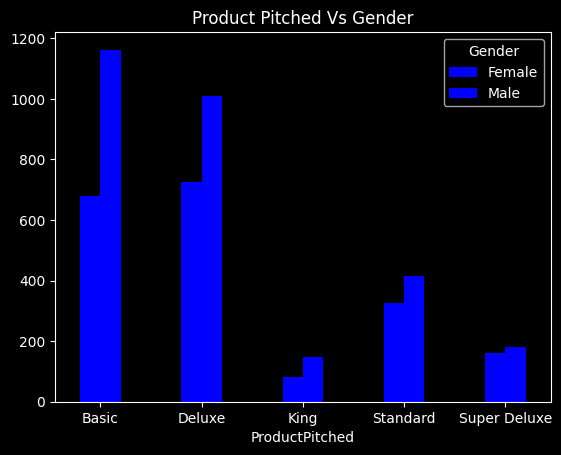

In [353]:
plt.figure(figsize = (15, 5))
df10.plot(kind='bar',rot=0,width=0.4,color="blue")
plt.title("Product Pitched Vs Gender")

In [278]:
#As we can see that the male customers are purchasing more product than female.
#And male prefer Basic package while female prefer Deluxe package.



---




L. Impact of marital status on travel preferences: does marital status affect the choice of
travel product, and if so, how do different marital statuses correlate with product

In [337]:
df11=df.groupby('MaritalStatus')['ProdTaken'].size()
df11

MaritalStatus
Divorced      950
Married      2340
Single        916
Unmarried     682
Name: ProdTaken, dtype: int64

Text(0.5, 1.0, 'Product Purchased Vs Martial Status')

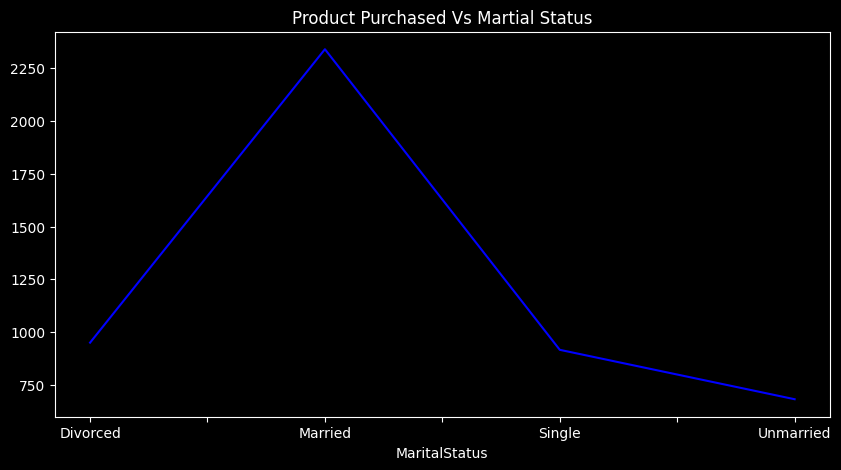

In [352]:
plt.figure(figsize = (10, 5))
df11.plot(kind='line',rot=0,color="blue")
plt.title("Product Purchased Vs Martial Status")

In [ ]:
#The person who are married are more likely to purchase product.



---



M. Relationship between number of children and travel product interest: how does the
number of children visiting (number of children visiting) impact the likelihood of
purchasing a travel product?

In [317]:
#Same as J.



---



N. Influence of owning a car on travel decisions: is there a correlation between owning a
car (own car) and the number of trips taken (number of trips) or the type of travel
product purchased?

In [329]:
df13=df.groupby('OwnCar')['NumberOfTrips'].sum()
df13.index=['Dont have a car','Have a car']
df13

Dont have a car    6057.406908
Have a car         9762.705981
Name: NumberOfTrips, dtype: float64

In [330]:
#We can clearly see there are more trips by the person who own a car.



---



O. Income level and product choice: how does the monthly income (monthly income) of
customers influence their choice of travel products, and is there a preferred product
for different income levels?  

In [331]:
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']

# Creating a new column 'IncomeGroup' based on the income bins
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

In [350]:
df12=df.groupby(["IncomeGroup", "ProductPitched"]).size().unstack()
df12

ProductPitched,Basic,Deluxe,King,Standard,Super Deluxe
IncomeGroup,,,,,
0-20K,837,195,1,6,1
20K-40K,1003,1537,229,736,341
40K-60K,0,0,0,0,0
60K-80K,0,0,0,0,0
80K-100K,2,0,0,0,0
100K+,0,0,0,0,0


Text(0.5, 1.0, 'Product Pitched Vs Income Group')

<Figure size 1000x500 with 0 Axes>

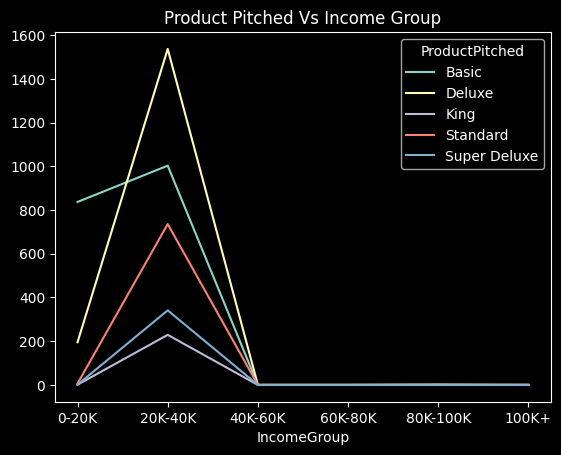

In [351]:
plt.figure(figsize = (10, 5))
df12.plot()
plt.title("Product Pitched Vs Income Group")